In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

In [4]:
TRAIN_DIR = 'D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128/Original Data With Conventional Data Augmentation Techniques/Original_Data'
IMG_SIZE = 128

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   zoom_range=0.15,
                                   zca_epsilon=1e-6,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest",
                                   validation_split=0.01)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    color_mode = 'grayscale',
    class_mode='binary',
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    color_mode = 'grayscale',
    class_mode='binary',
    subset='validation')

Found 2654 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [8]:
model.compile(SGD(learning_rate = 0.0025, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history=model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=1, shuffle=1)

Train for 42 steps, validate for 1 steps
Epoch 1/10
42/42 [==============================] - 8s 202ms/step - loss: 0.4052 - accuracy: 0.8252 - val_loss: 0.3927 - val_accuracy: 0.7692
Epoch 2/10
42/42 [==============================] - 8s 201ms/step - loss: 0.4202 - accuracy: 0.8342 - val_loss: 0.4248 - val_accuracy: 0.7308
Epoch 3/10
42/42 [==============================] - 8s 202ms/step - loss: 0.3944 - accuracy: 0.8316 - val_loss: 0.3779 - val_accuracy: 0.8462
Epoch 4/10
42/42 [==============================] - 8s 200ms/step - loss: 0.3515 - accuracy: 0.8557 - val_loss: 0.4550 - val_accuracy: 0.8077
Epoch 5/10
42/42 [==============================] - 8s 202ms/step - loss: 0.3303 - accuracy: 0.8723 - val_loss: 0.4822 - val_accuracy: 0.8462
Epoch 6/10
42/42 [==============================] - 9s 204ms/step - loss: 0.3066 - accuracy: 0.8742 - val_loss: 0.4129 - val_accuracy: 0.8077
Epoch 7/10
42/42 [==============================] - 8s 201ms/step - loss: 0.3094 - accuracy: 0.8798 - val_l

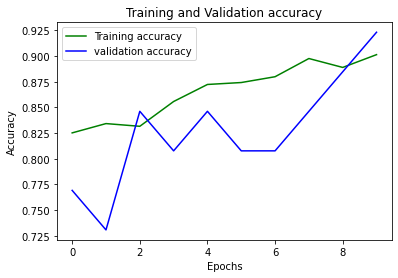

In [11]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train[0:10], 'g', label='Training accuracy')
plt.plot(epochs, loss_val[0:10], 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

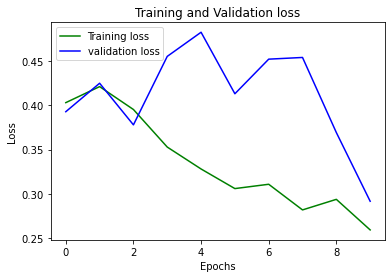

In [12]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.save('D:/AA Desktop/Stuff/Research/College/Data Augmentation/11Data/1. Images for Training/Combined_128X128//Original Data With Conventional Data Augmentation Techniques/CNN_With_Conventional_Data_Augmentation_Technuqies_X-Ray_Data.h5')